<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [9]:
# AIDI1006-brands.ipynb v.2023
# Sample code 1 - using Computer Vision / CognitiveServices

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

from google.colab import drive
drive.mount('/content/drive')

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "7159977d23c14abe9254b8429040885b"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Quickstart variables // These variables are shared by several examples
local_image_path = "/content/drive/My Drive/images/gray-shirt-logo.jpg"
local_image_path = "/content/drive/My Drive/images/brand2.jpg"
remote_image_url = "https://homepages.cae.wisc.edu/~ece533/images/airplane.png"
remote_image_url = "https://www.ctvnews.ca/content/dam/ctvnews/en/images/2022/12/22/unlicensed-starbucks-cafe-in-baghdad--iraq-1-6205307-1671713631114.jpg"
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"

# Detect Brands - local
# This example detects common brands like logos and puts a bounding box around them.
print("===== Detect Brands - local =====")
local_image = open(local_image_path, "rb") # Open image file
local_image_features = ["brands"] # Select the visual feature(s) you want
# Call API with image and features
detect_brands_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

# Print detection results with bounding box and confidence score
print("Detecting brands in local image: ")
if len(detect_brands_results_local.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_local.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))
print()
# END - Detect brands - local

# Detect Brands - remote
# This example detects common brands like logos and puts a bounding box around them.
print("===== Detect Brands - remote =====")
remote_image_features = ["brands"] # Get a URL with a brand logo // Select the visual feature(s) you want
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print detection results with bounding box and confidence score
print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))
print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
===== Detect Brands - local =====
Detecting brands in local image: 
'Pepsi' brand detected with confidence 88.9% at location 773, 867, 284, 443
'Pepsi' brand detected with confidence 69.8% at location 1026, 1165, 461, 518
'Pepsi' brand detected with confidence 88.3% at location 1008, 1177, 268, 441
'Coca-Cola' brand detected with confidence 77.7% at location 210, 501, 302, 507
'Pepsi' brand detected with confidence 88.5% at location 593, 763, 284, 482

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149



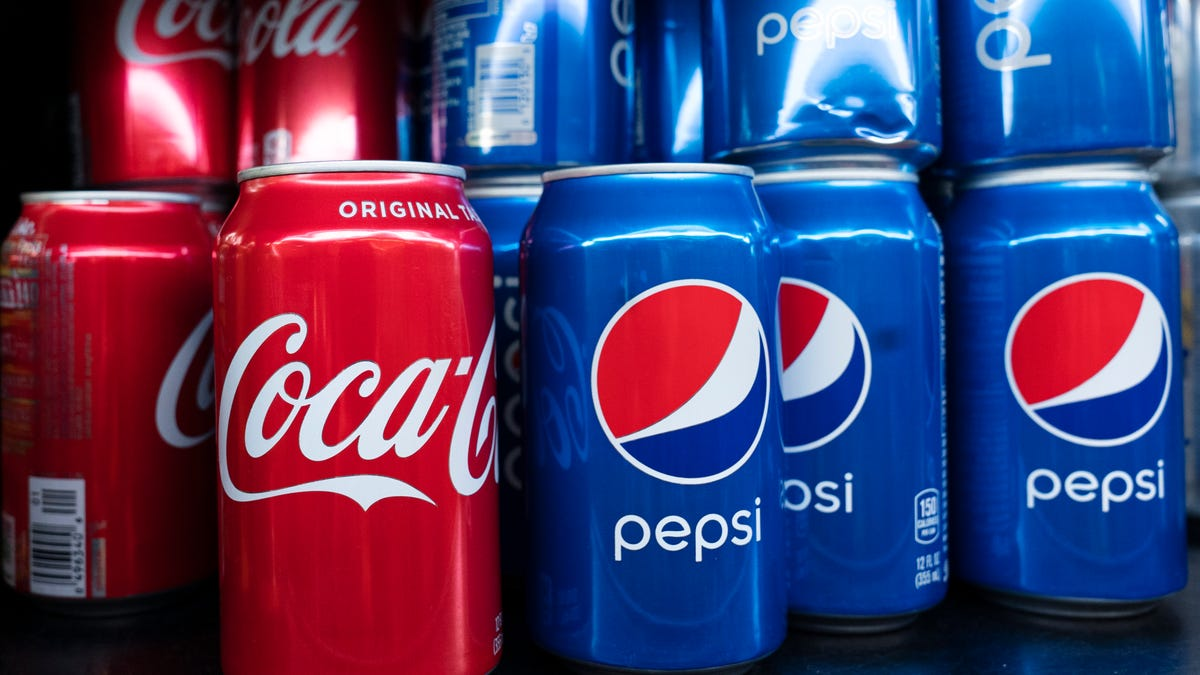

In [10]:
# Read the image stored in the Google Drive // Local image file
from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_image_path)
cv2_imshow(img)

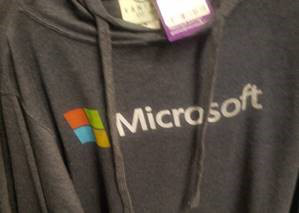

In [11]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(remote_image_url, stream=True).raw)
img